In [155]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [156]:
plt.style.use('fivethirtyeight')

In [157]:
# general settings
class CFG:
    data_path = './../data'
    img_dim1 = 20
    img_dim2 = 10
    
    
# adjust the parameters for displayed figures    
plt.rcParams.update({'figure.figsize': (CFG.img_dim1, CFG.img_dim2)}) 

In [158]:
nsw_totaldemand = pd.read_csv(
    os.path.join(CFG.data_path, 'NSW', 'totaldemand_nsw.csv'), 
    parse_dates=['DATETIME'], 
    dayfirst=True
)

In [159]:
nsw_totaldemand.set_index('DATETIME', inplace=True)

In [160]:
nsw_totaldemand = nsw_totaldemand['TOTALDEMAND'].dropna(axis=0, inplace=False)

In [161]:
if not pd.infer_freq(nsw_totaldemand.index):
    # create new date range if there are gaps or irregularities
    new_index = pd.date_range(start=nsw_totaldemand.index.min(), end=nsw_totaldemand.index.max(), freq='30min')
    nsw_totaldemand = nsw_totaldemand.reindex(new_index, method='nearest')  # fill or interpolate as needed

## Decomposition
- 48 indicates that we expect a daily pattern, and we have 30 min sample intervals
- i expect to change this

In [162]:
decomposition = sm.tsa.seasonal_decompose(nsw_totaldemand, model='additive', period=48)

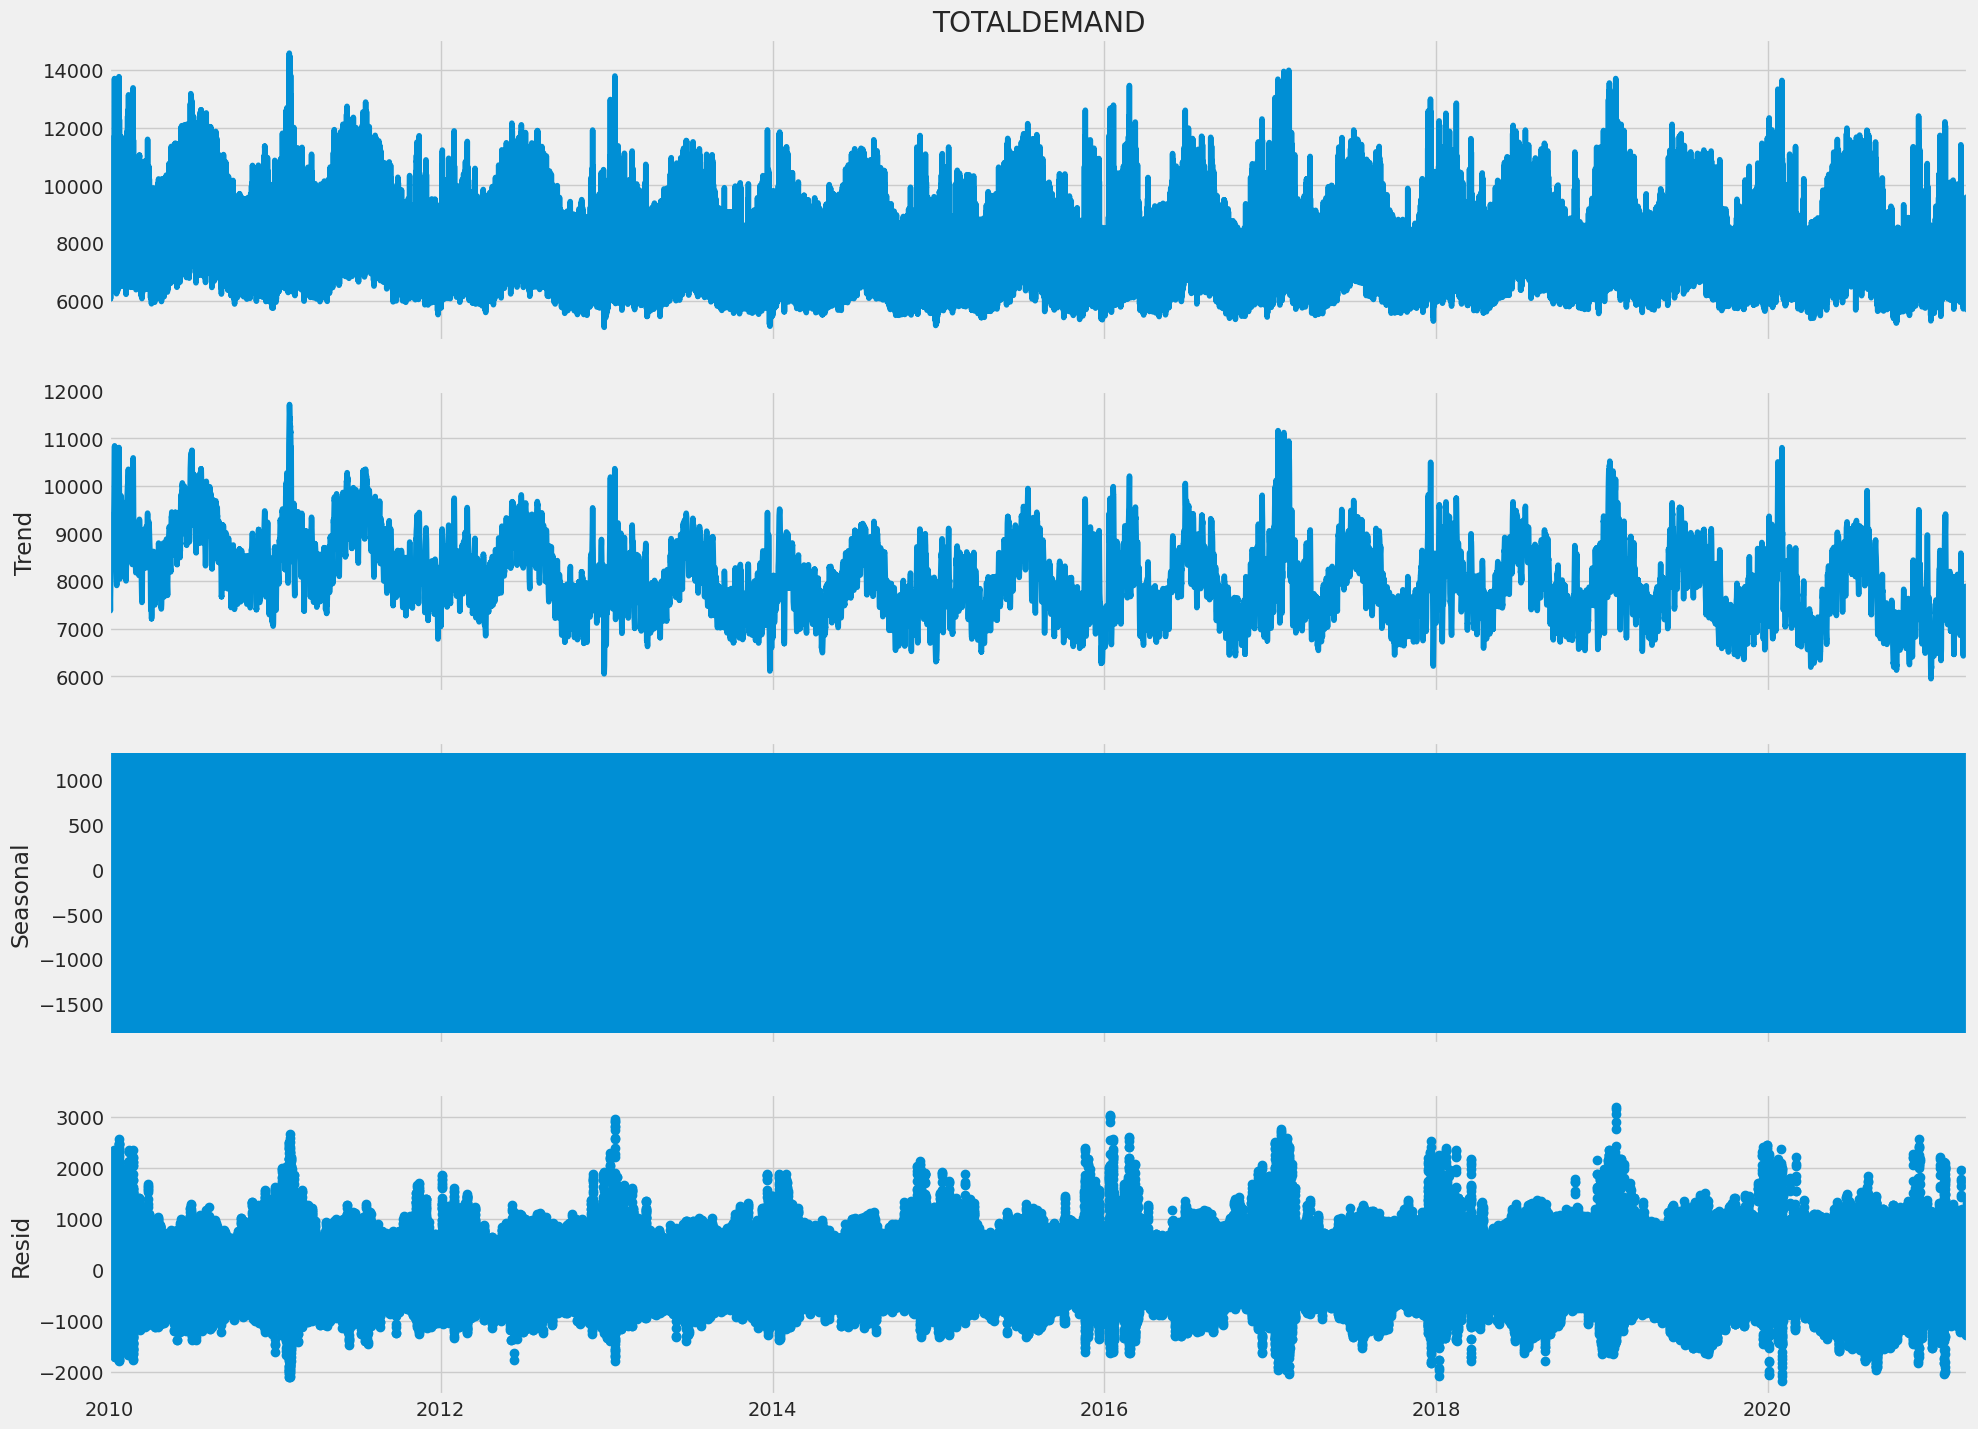

In [163]:
fig = decomposition.plot()
fig.set_size_inches(20, 15)
plt.show()

## Dependence

## stationarity

## ACF / PACF

## AD Fuller

## log transformation

## 